<a href="https://colab.research.google.com/github/KAyush16/EDA/blob/main/olympics_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# importing the datasets
olympics = pd.read_csv('/content/dataset_olympics.csv')
df = olympics.copy()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## OverView Of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [ ]:
print("Null Values in the DataFrame: \n ",df.isna().sum())
print("Shape of the Data: ",df.shape)

Null Values in the DataFrame: 
  ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64
Shape of the Data:  (70000, 15)


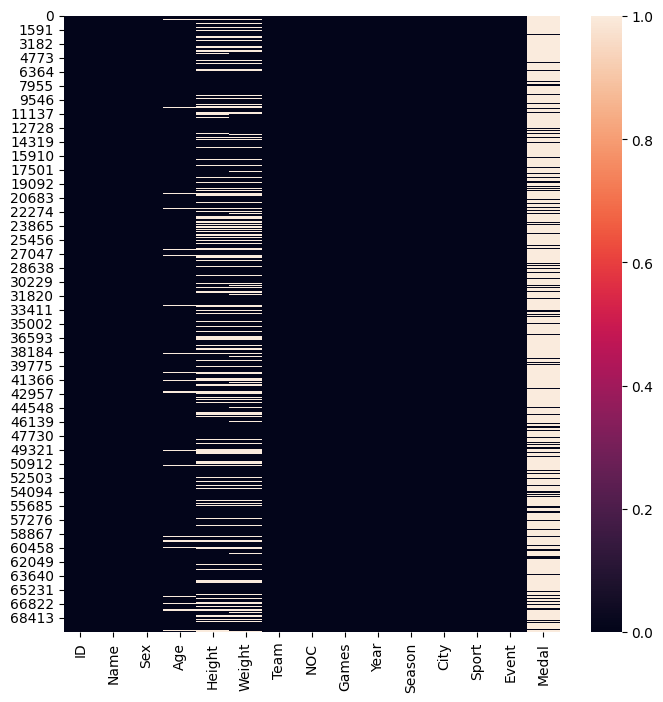

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isna())
plt.show()

Null Values in
- Height
- Weight
- Age
- Medal

### Handle and clean the 'Age' feature: check for missing values, visualize distribution, and handel outlires

In [ ]:
#Removing the null values
df['Age'].describe()

,Age
count,67268.000000
mean,25.644645
std,6.485239
min,11.000000
25%,21.000000
50%,25.000000
75%,28.000000
max,88.000000


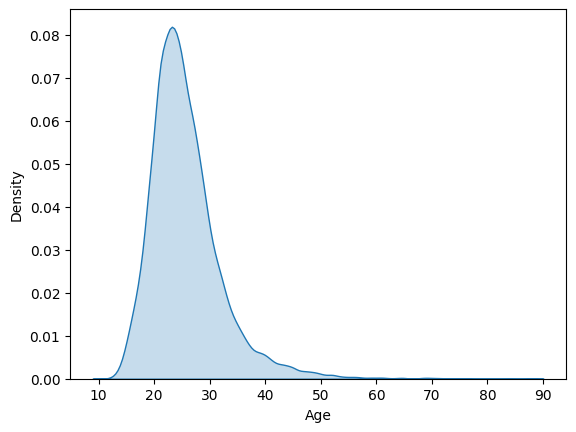

In [ ]:
sns.kdeplot(data=df, x= 'Age', fill=True)
plt.show()

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-9-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
# as in normal distribution most values lie between (mean + 3*std) and (mean-3*std)
norm_upper = df["Age"].mean() + 3 * df["Age"].std()
norm_lower = df["Age"].mean() - 3 * df["Age"].std()

In [ ]:
df = df[(df["Age"] > norm_lower) & (df["Age"] < norm_upper)]

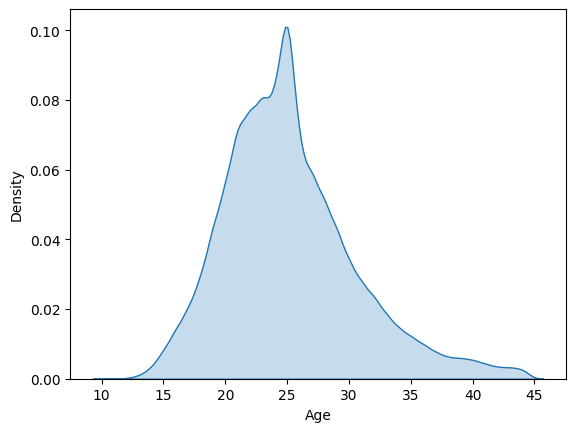

In [ ]:
sns.kdeplot(data=df, x= 'Age', fill=True)
plt.show()

### Handle and clean the 'Weight' feature: check for missing values, visualize distribution, and handel outlires

In [ ]:
df['Weight'].describe()

,Weight
count,52487.000000
mean,70.864014
std,14.228640
min,25.000000
25%,61.000000
50%,70.000000
75%,79.000000
max,214.000000


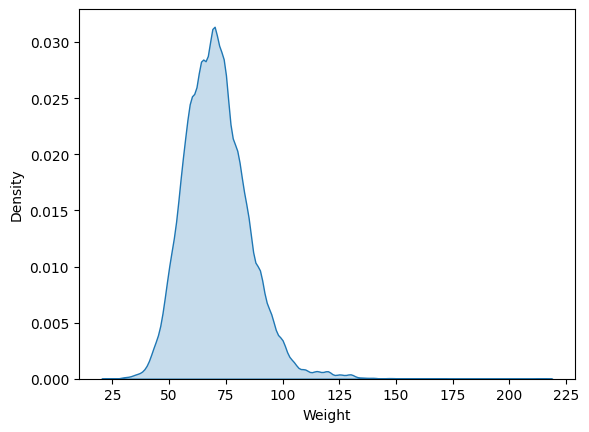

In [ ]:
sns.kdeplot(data=df, x= 'Weight', fill=True)
plt.show()

In [ ]:
df['Weight'].fillna(df['Weight'].median(), inplace=True)

/tmp/ipython-input-15-657487102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(df['Weight'].median(), inplace=True)
/tmp/ipython-input-15-657487102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'].fillna(df['Weight'].median(), inplace=True)


In [ ]:
norm_upper = df['Weight'].mean() + 3*df['Weight'].std()
norm_lower = df['Weight'].mean() - 3*df['Weight'].std()

In [ ]:
df = df[(df['Weight']<norm_upper) & (df['Weight']>norm_lower)]

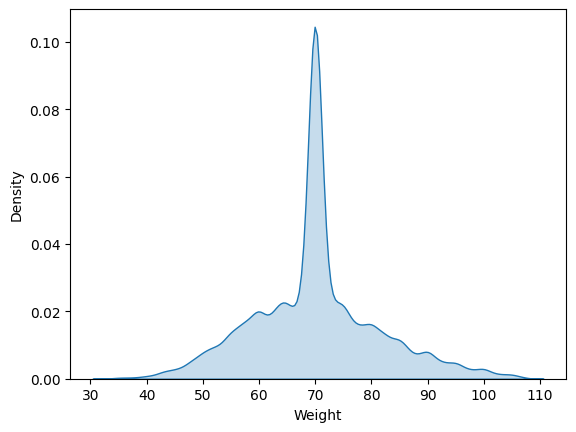

In [ ]:
sns.kdeplot(data=df, x= 'Weight', fill=True)
plt.show()

### Handle and clean the 'Height' feature: check for missing values, visualize distribution, and handel outlires

In [ ]:
df['Height'].describe()

,Height
count,52482.000000
mean,175.313517
std,10.195004
min,127.000000
25%,168.000000
50%,175.000000
75%,182.000000
max,223.000000


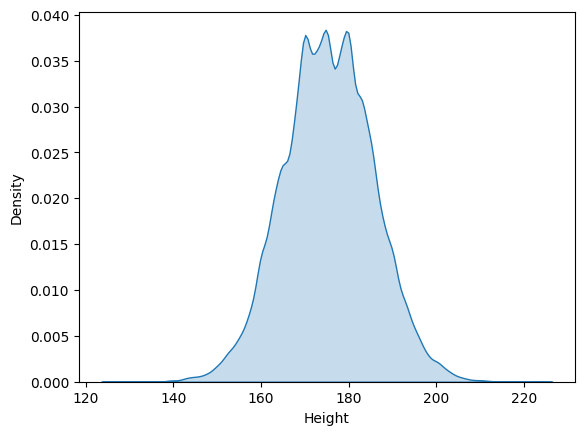

In [ ]:
sns.kdeplot(data=df, x= 'Height', fill=True)
plt.show()

In [ ]:
df['Height'].fillna(df['Height'].median(), inplace=True)

/tmp/ipython-input-21-2987394136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(df['Height'].median(), inplace=True)


In [ ]:
norm_upper = df['Height'].mean() + 3*df['Height'].std()
norm_lower = df['Height'].mean() - 3*df['Height'].std()

In [ ]:
df = df[(df['Height']<norm_upper) & (df['Height']>norm_lower)]

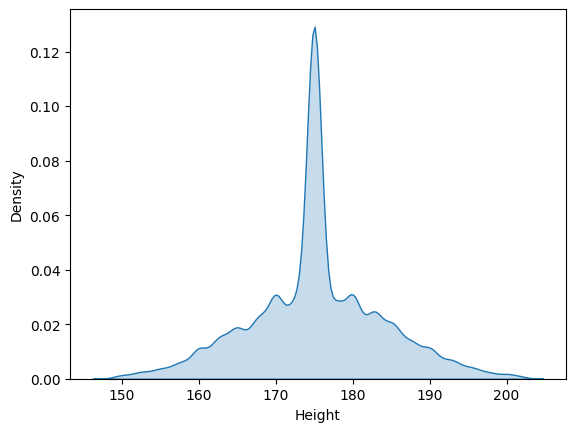

In [ ]:
sns.kdeplot(data=df, x= 'Height', fill=True)
plt.show()

#### Medal null values

In [ ]:
df['Medal'].fillna('No Medal', inplace=True)

/tmp/ipython-input-25-3111917239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna('No Medal', inplace=True)


<Axes: >

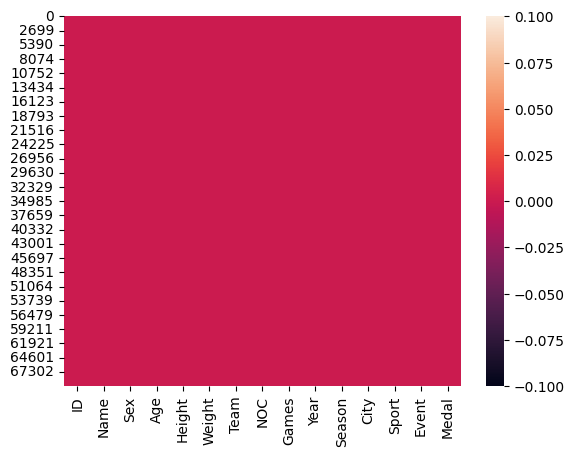

In [ ]:
# to check if there is any null value left
sns.heatmap(df.isna()) # no null value left

# EDA

## 🏋️‍♂️ Athlete Demographics

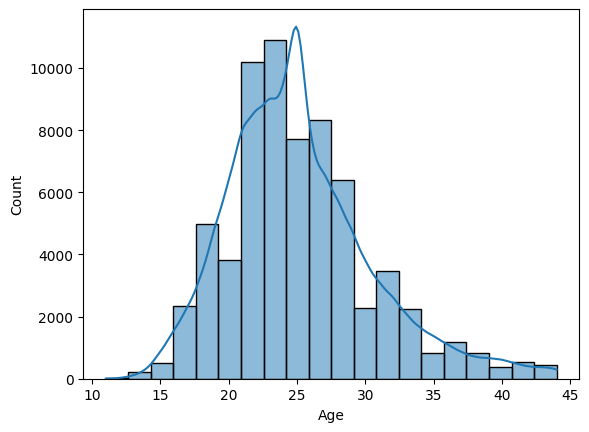

In [ ]:
# age distribution of the Athletes
sns.histplot(data=df['Age'],bins=20,kde=True)
plt.show()

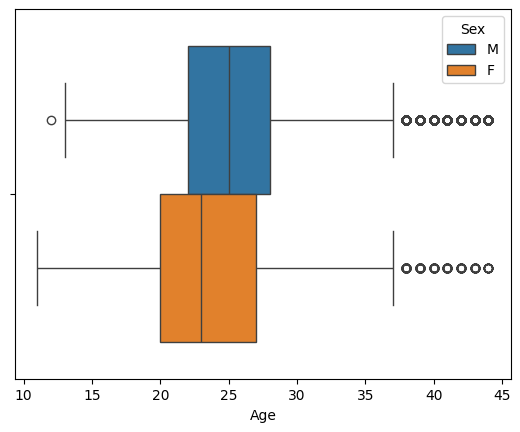

In [ ]:
# age and gender relation
sns.boxplot(data=df, x='Age',hue='Sex')
plt.show()
#  the median age for both male and female athletes is similar, around 25 years old.And Some old Age participants as outliers

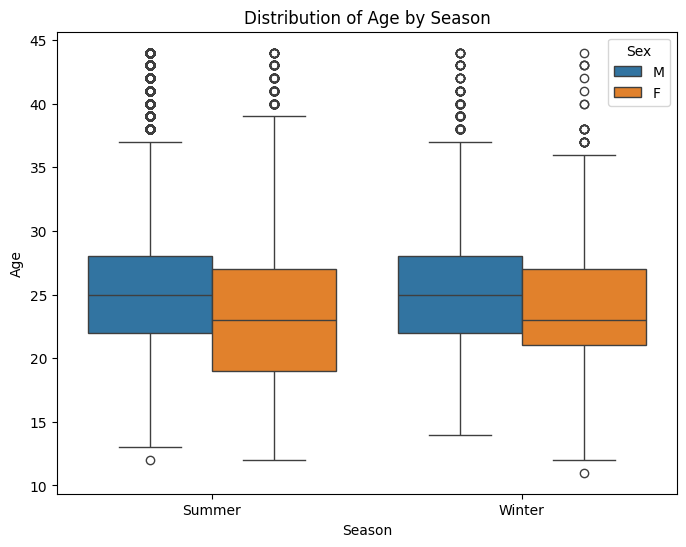

In [ ]:
# distribution of age as per season
plt.figure(figsize=(8,6))
sns.boxplot(data=df ,  x='Season', y='Age',hue='Sex')
plt.title('Distribution of Age by Season')
plt.xlabel('Season')
plt.ylabel('Age')
plt.show()

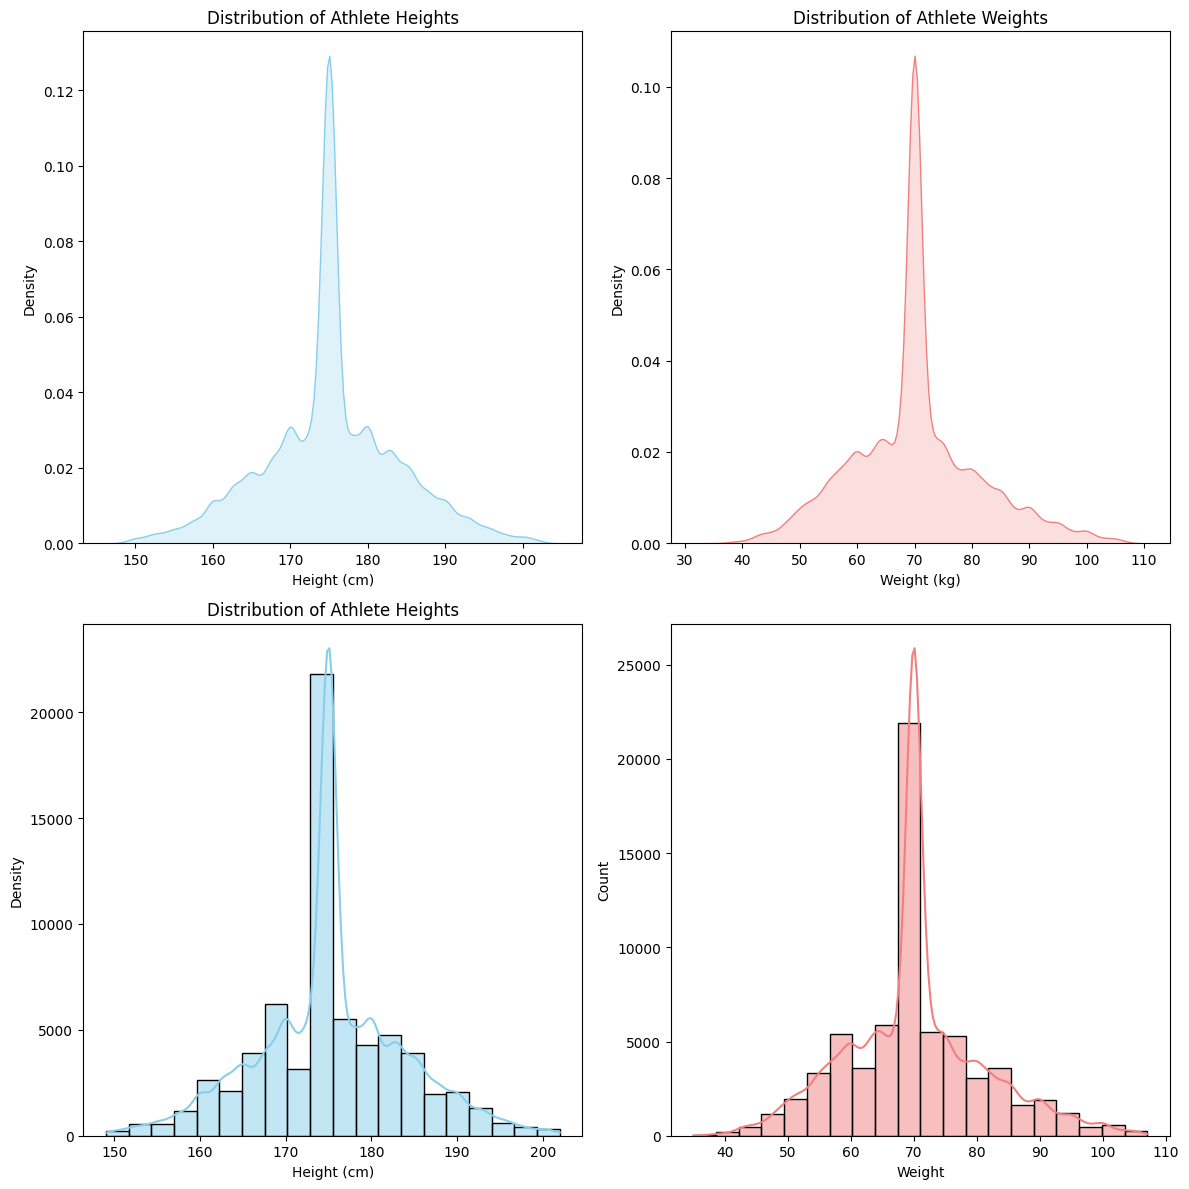

In [ ]:
# height and weight distibution --> subplots
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(2, 2, 1)
sns.kdeplot(data=df, x='Height', fill=True, color='skyblue')
ax1.set_title('Distribution of Athlete Heights')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Density')

ax2 = fig.add_subplot(2, 2, 2)
sns.kdeplot(data=df, x='Weight', fill=True, color='lightcoral')
ax2.set_title('Distribution of Athlete Weights')
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Density')

ax3=fig.add_subplot(2,2,3)
sns.histplot(data=df['Height'],bins=20,kde=True,color='skyblue')
ax3.set_title('Distribution of Athlete Heights')
ax3.set_xlabel('Height (cm)')
ax3.set_ylabel('Density')

ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(data=df, x='Weight',bins=20,kde=True, color='lightcoral')
ax2.set_title('Distribution of Athlete Weights')
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Density')



plt.tight_layout()
plt.show()

## Country Demographics

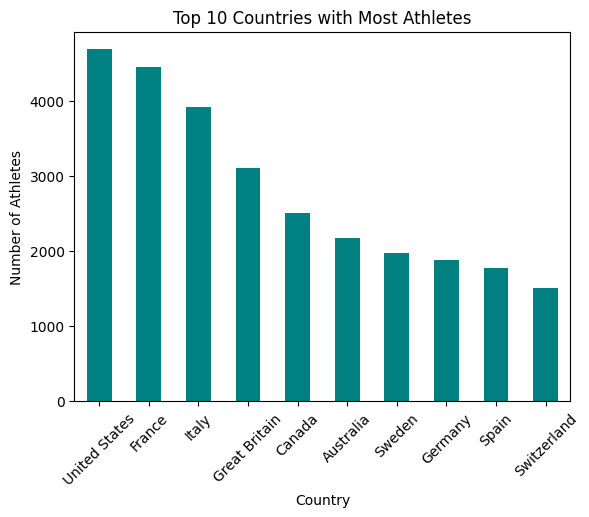

In [ ]:
# top 10 participating countries
df.Team.value_counts(ascending = False).head(10).plot(kind='bar',color='teal')
plt.title("Top 10 Countries with Most Athletes")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Number of Athletes")
plt.show()

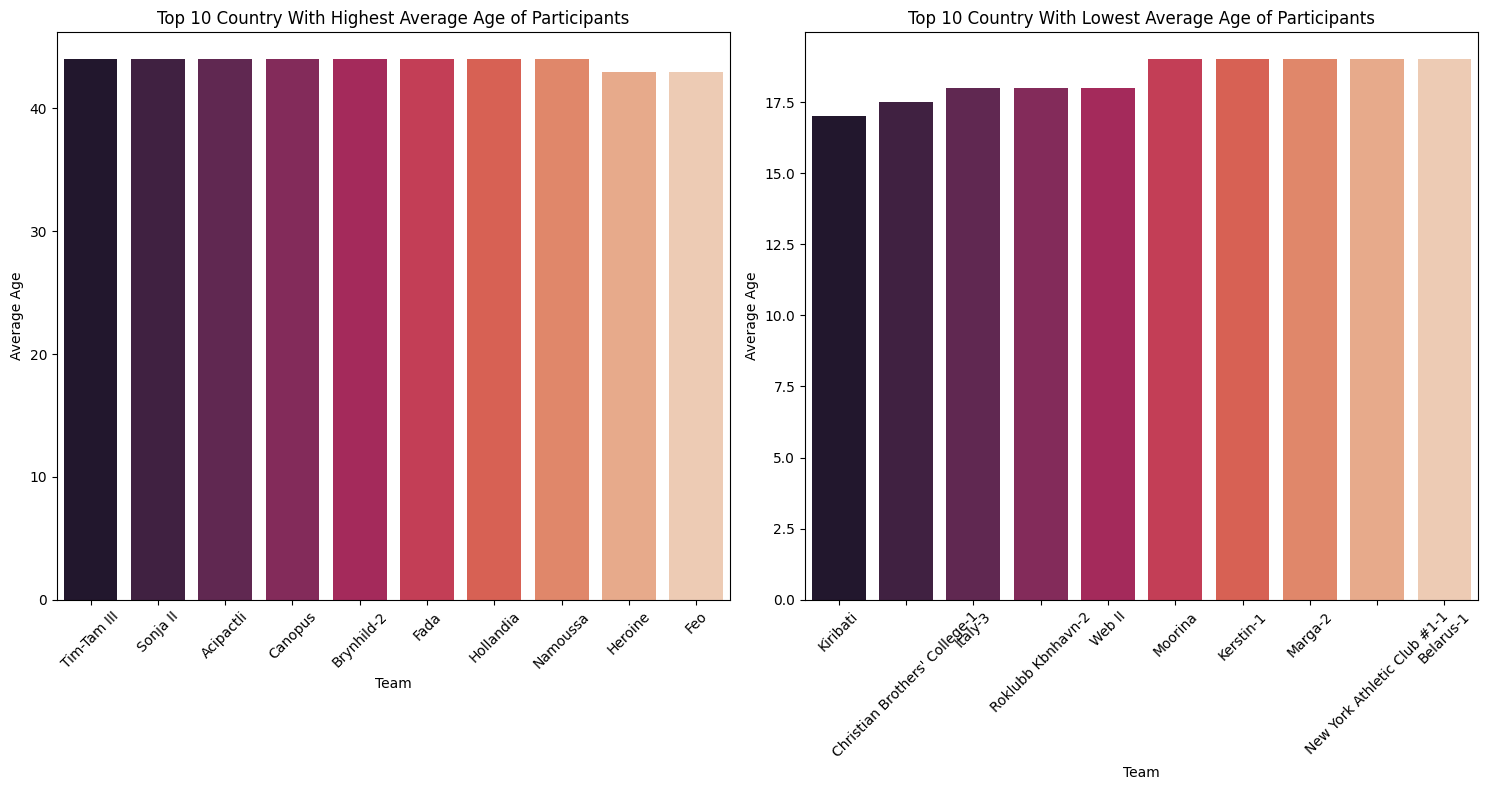

In [ ]:
# top countries with highest avg age of participants
fig = plt.figure(figsize=(15,8))

country_ave_age1 = df.groupby('Team')['Age'].mean().sort_values(ascending=False).head(10)
ax1 = plt.subplot(1,2,1)
sns.barplot(x=country_ave_age1.index, y=country_ave_age1.values, palette='rocket')
ax1.set_title('Top 10 Country With Highest Average Age of Participants')
ax1.set_xlabel('Team')
ax1.set_ylabel('Average Age')
ax1.tick_params(axis='x', rotation=45) # Use tick_params for rotation

# top countries with lowest avg age of participants
country_ave_age2 = df.groupby('Team')['Age'].mean().sort_values(ascending=True).head(10)
ax2 = plt.subplot(1,2,2) # Use a different subplot index for the second plot
sns.barplot(x=country_ave_age2.index, y=country_ave_age2.values, palette='rocket')
ax2.set_title('Top 10 Country With Lowest Average Age of Participants')
ax2.set_xlabel('Team')
ax2.set_ylabel('Average Age')
ax2.tick_params(axis='x', rotation=45) # Use tick_params for rotation


plt.tight_layout()
plt.show()

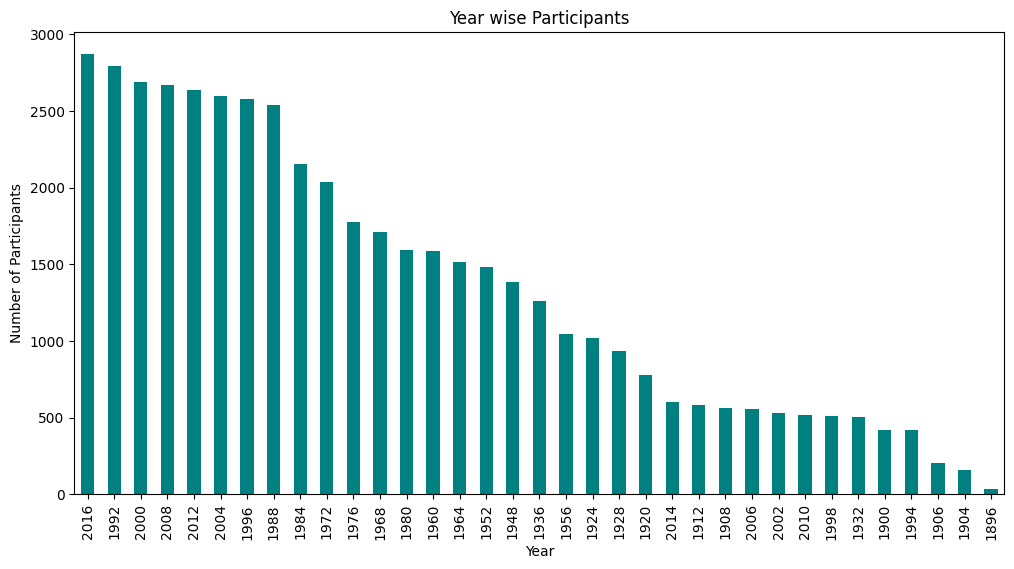

In [ ]:
# year wise participants
year_participants_count = df.groupby('Year')['ID'].nunique().sort_values(ascending = False)
plt.figure(figsize=(12,6))
year_participants_count.plot(kind='bar',color='teal')
plt.title('Year wise Participants')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Participants')
plt.show()

## Sports And Medal Demographics

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


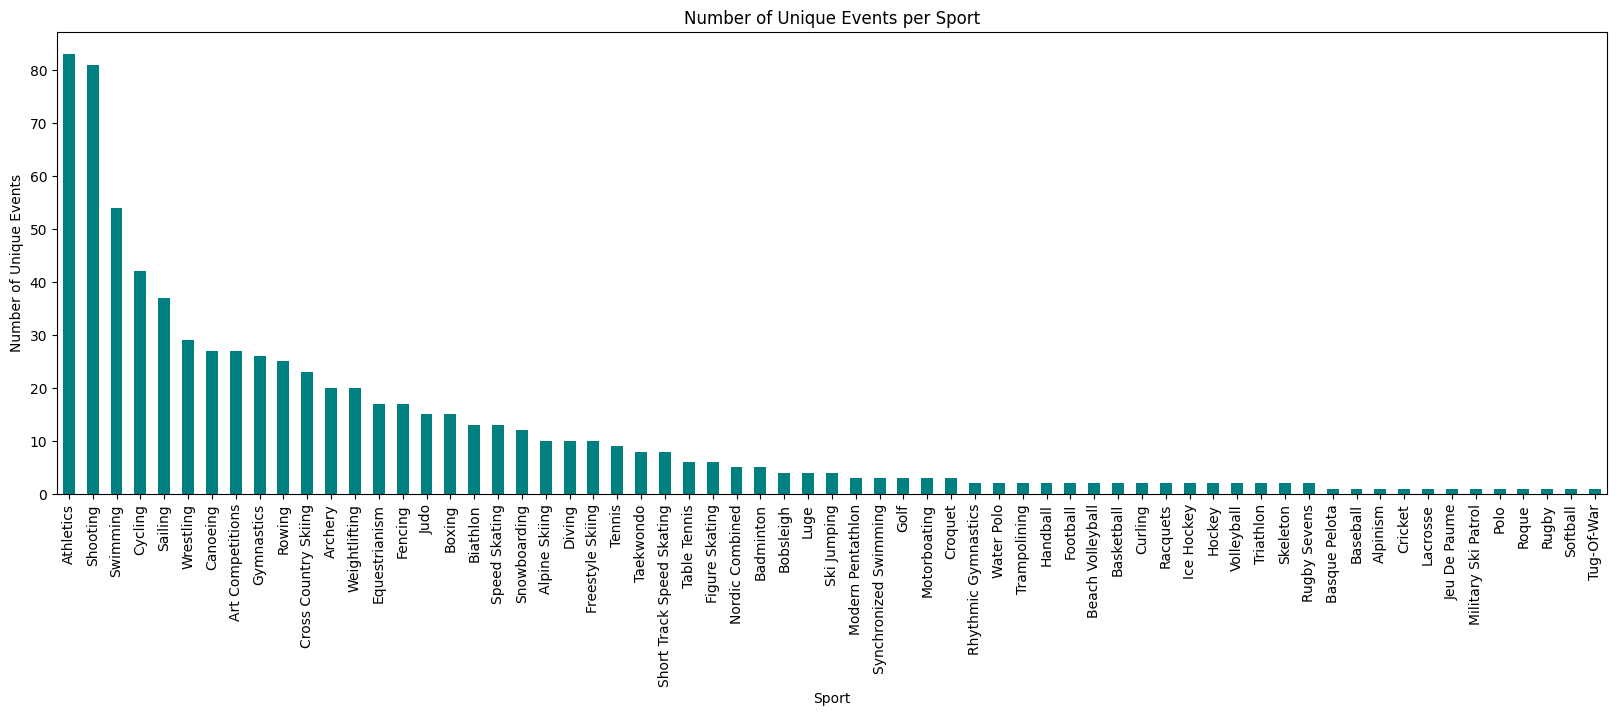

In [ ]:
# number of unique sports and event count per sports
sports_unique = df.groupby('Sport')['Event'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sports_unique.plot(kind='bar', figsize=(20, 6), color='teal')
plt.xlabel('Sport')
plt.ylabel('Number of Unique Events')
plt.title('Number of Unique Events per Sport')
plt.xticks(rotation=90)
plt.show()

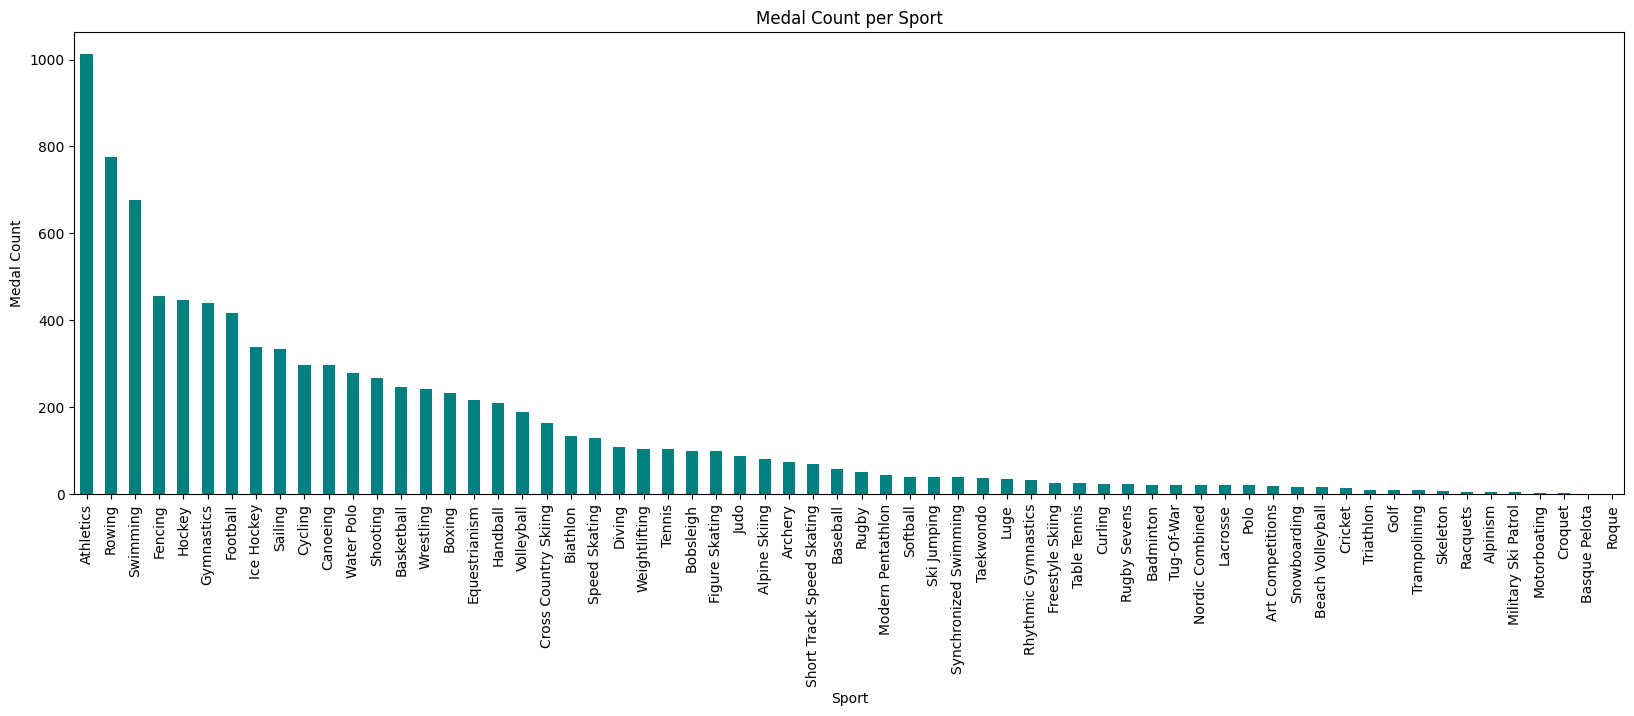

In [ ]:
# df.head()
# most medal in each sports
sports_medal_count = df[df['Medal'] != 'No Medal'].groupby('Sport')['Medal'].count().sort_values(ascending=False)
sports_medal_count.plot(kind='bar',figsize=(20, 6), color='teal')
plt.xlabel('Sport')
plt.ylabel('Medal Count')
plt.title('Medal Count per Sport')
plt.xticks(rotation=90)
plt.show()

Medal Count of Top N countries, Enter N: 5


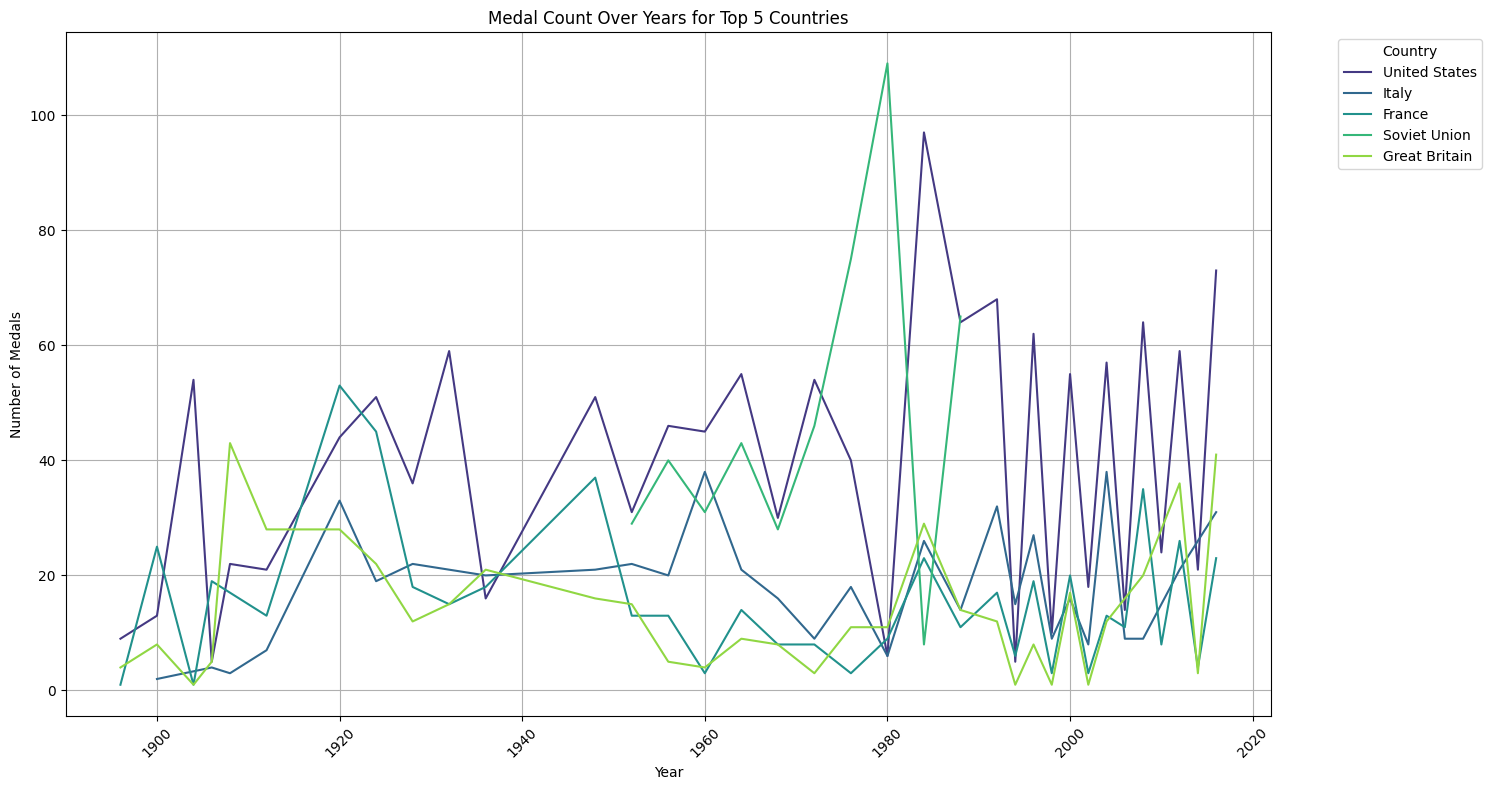

In [ ]:
# # number of medal by Top countries(in terms of the Medal Count) over the year
medal_year_country = df[df['Medal']!= 'No Medal'].groupby(['Team','Year'])['Medal'].count().sort_values(ascending=False)
medal_unstack = medal_year_country.unstack()

# Select the top N countries (adjust N as needed)
top_n_countries = int(input("Medal Count of Top N countries in terms of Medal, Enter N: "))
top_countries_medal_unstack = medal_unstack.sum(axis=1).sort_values(ascending=False).head(top_n_countries).index
medal_unstack_top = medal_unstack.loc[top_countries_medal_unstack]

plt.figure(figsize=(15, 8))
sns.lineplot(data=medal_unstack_top.T, palette='viridis', dashes=False)

plt.title(f'Medal Count Over Years for Top {top_n_countries} Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# most diverse participation across genders in Sports
sports_20 = df[['Sport', 'Sex']].value_counts().head(20) # multilevel dataframe
sports_20_df = sports_20.reset_index(name='count') # reset index to convert to DataFrame
sports_20_df

,Sport,Sex,count
0,Athletics,M,7259
1,Gymnastics,M,4037
2,Swimming,M,3486
3,Athletics,F,3061
4,Fencing,M,2589
5,Cycling,M,2468
6,Swimming,F,2448
7,Shooting,M,2290
8,Rowing,M,2136
9,Gymnastics,F,1973


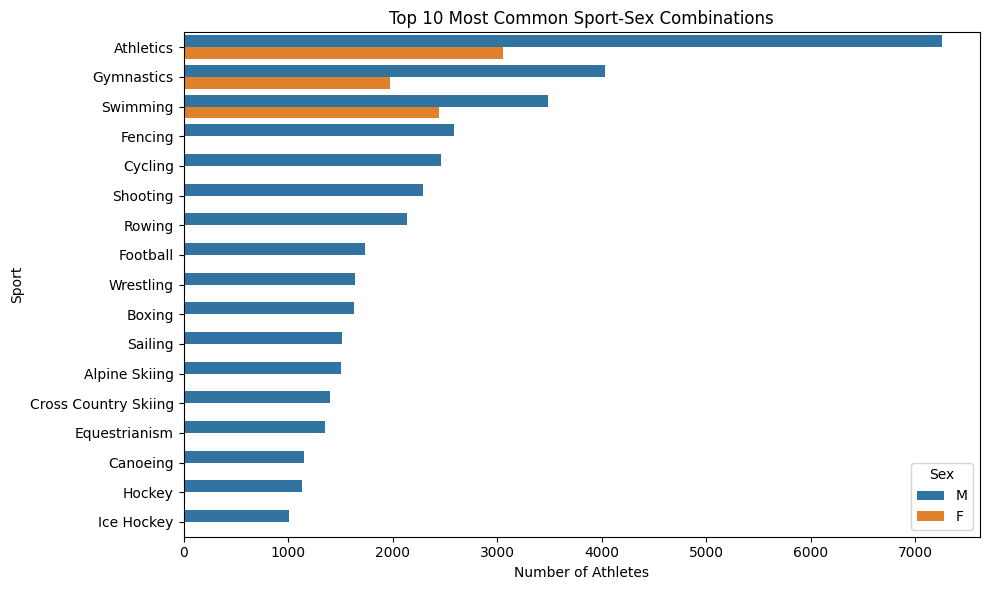

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sports_20_df, x='count', y='Sport', hue='Sex')

plt.title('Top 10 Most Common Sport-Sex Combinations')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

In [ ]:
medal_country = df[df['Medal']!= 'No Medal'].groupby('Team')['Medal'].count().sort_values(ascending = False).head(15)
medal_country

,Medal
Team,
United States,1379
Italy,557
France,555
Soviet Union,474
Great Britain,464
Germany,376
Australia,368
Sweden,329
Canada,320


In [ ]:
## Some ROUGH WORK
# # Plot top 20 medal-winning countries
# medal_country = df[df['Medal']!= 'No Medal'].groupby('Team')['Medal'].count().sort_values(ascending=False).head(20)
# medals_df = medal_country.reset_index()
# sns.barplot(data=medals_df, y='Medal', x='Team', palette='rocket')
# df[df['Medal'] != 'No Medal']['Team'].value_counts().head(20)

/tmp/ipython-input-42-3883374775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medal_country.index, y=medal_country.values, palette='rocket') # or medal_count.reset_index()--> plot


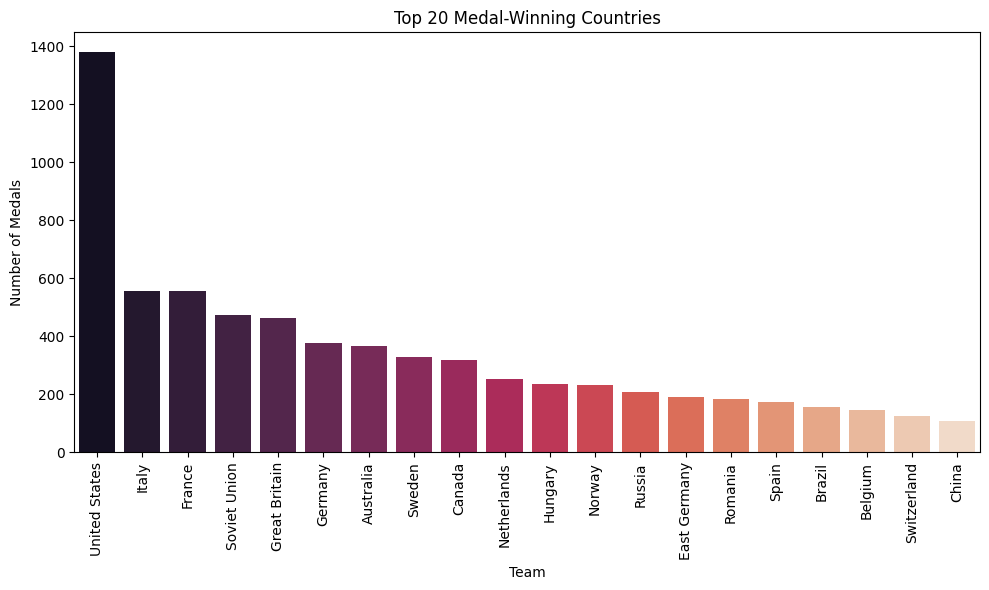

In [ ]:
## Plot top 20 medal-winning countries
medal_country = df[df['Medal']!= 'No Medal'].groupby('Team')['Medal'].count().sort_values(ascending=False).head(20)
# medal_country= df[df['Medal'] != 'No Medal']['Team'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=medal_country.index, y=medal_country.values, palette='rocket') # or medal_count.reset_index()--> plot
plt.title('Top 20 Medal-Winning Countries')
plt.xlabel('Team')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-43-1685131449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_sex.index, y=medals_by_sex.values, palette='Set2')


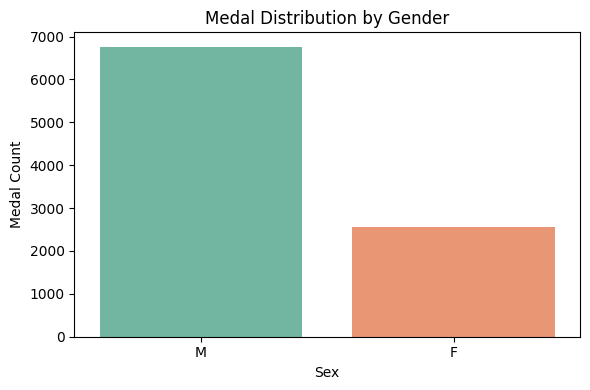

In [ ]:
# medal and sex relation
medals_by_sex = df[df['Medal'] != 'No Medal']['Sex'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=medals_by_sex.index, y=medals_by_sex.values, palette='Set2')
plt.title('Medal Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Medal Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-44-1945198704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_sport.values, y=medals_by_sport.index, palette='cubehelix')


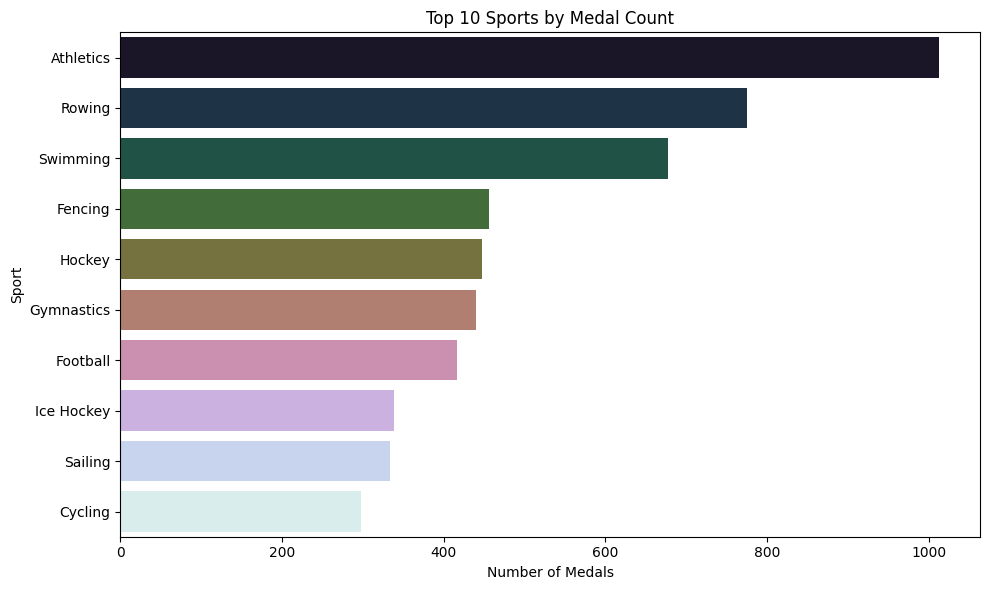

In [ ]:
# top 10 sports with highest medal
medals_by_sport = df[df['Medal'] != 'No Medal']['Sport'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=medals_by_sport.values, y=medals_by_sport.index, palette='cubehelix')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

/tmp/ipython-input-45-680845786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_athelete_medal.values, y=top_athelete_medal.index, palette='rocket')


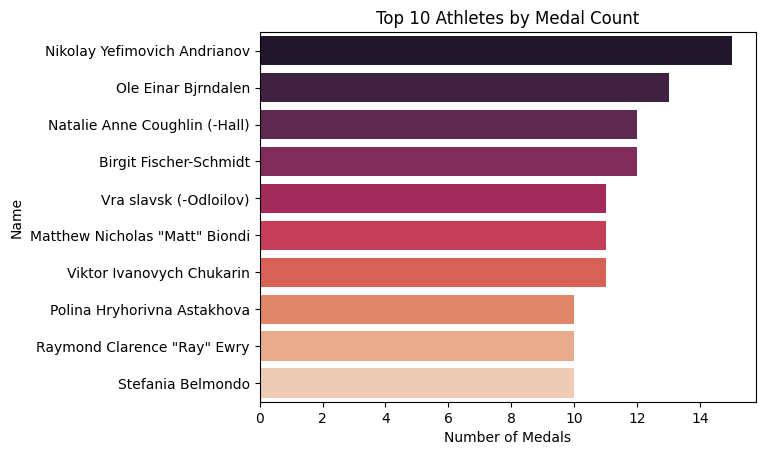

In [ ]:
# top 10 athelets with highest medal
top_athelete_medal = df[df['Medal'] != 'No Medal'].groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_athelete_medal.values, y=top_athelete_medal.index, palette='rocket')
plt.title('Top 10 Athletes by Medal Count')
plt.xlabel('Number of Medals')
plt.show()

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


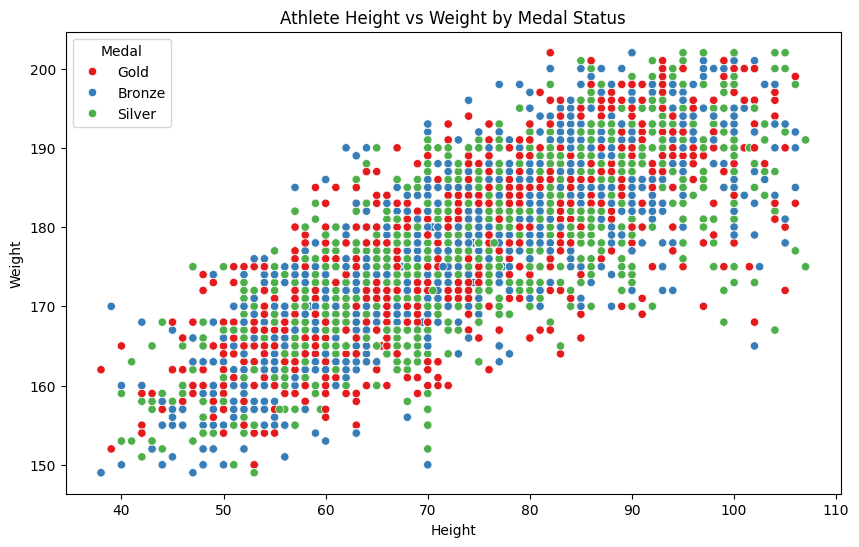

In [ ]:
# athelete height and weight who won medal
temp_df = df[df['Medal']!= 'No Medal']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_df, y='Height', x='Weight', hue='Medal', palette='Set1')
plt.title('Athlete Height vs Weight by Medal Status')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Medal')
plt.show()

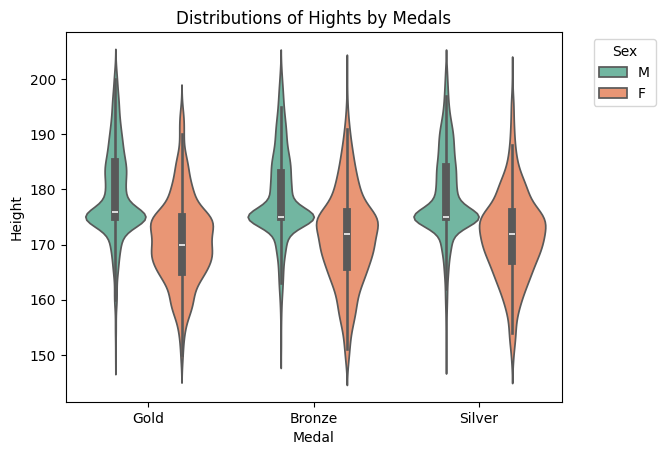

In [ ]:
sns.violinplot(data=temp_df, x='Medal', y='Height', palette='Set2', hue='Sex')
plt.title('Distributions of Hights by Medals')
plt.xlabel('Medal')
plt.ylabel('Height')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()